### KNN

### Part 1

In [62]:
def KNN_Regression(X_train, y_train, new_X, k):
  n = X_train.shape[0]
  # Calculating Euclidean distances between the new point and every point in this dataset
  distances = [np.linalg.norm(np.array(X_train.T[j])-np.array(new_X)) for j in range(0, n)]
  sort_by_indices = sorted(range(len(distances)), key=lambda m: distances[m])[:k]
  y_values = [y_train.T[t] for t in sort_by_indices]
  avg = sum(np.array(y_values))/k
  return avg[0]



##### We first calculate the distances between the new instance and every point in the training dataset and save them in a list. This will take O(nd) since there are n points in the training dataset and every point has d-dimensional features. Next, we sort the list and get the indices of the shortest k distances, which will take O(n). Finally, we average the y values of the k nearest neighbours, and this needs O(k). Overall, the time complexity is O(nd).

### Part 2

In [63]:
from google.colab import files
uploaded = files.upload()

Saving X_test_D.csv to X_test_D (2).csv
Saving X_test_E.csv to X_test_E (2).csv
Saving X_test_F.csv to X_test_F (2).csv
Saving X_train_D.csv to X_train_D (2).csv
Saving X_train_E.csv to X_train_E (2).csv
Saving X_train_F.csv to X_train_F (2).csv
Saving Y_test_D.csv to Y_test_D (2).csv
Saving Y_test_E.csv to Y_test_E (2).csv
Saving Y_test_F.csv to Y_test_F (2).csv
Saving Y_train_D.csv to Y_train_D (2).csv
Saving Y_train_E.csv to Y_train_E (2).csv
Saving Y_train_F.csv to Y_train_F (2).csv


In [64]:
import pandas as pd
import io
# Read data files
X_test_D = pd.read_csv(io.BytesIO(uploaded['X_test_D.csv']), header=None)
X_test_E = pd.read_csv(io.BytesIO(uploaded['X_test_E.csv']), header=None)
X_test_F = pd.read_csv(io.BytesIO(uploaded['X_test_F.csv']), header=None)
X_train_D = pd.read_csv(io.BytesIO(uploaded['X_train_D.csv']), header=None)
X_train_E = pd.read_csv(io.BytesIO(uploaded['X_train_E.csv']), header=None)
X_train_F = pd.read_csv(io.BytesIO(uploaded['X_train_F.csv']), header=None)
Y_test_D = pd.read_csv(io.BytesIO(uploaded['Y_test_D.csv']), header=None)
Y_test_E = pd.read_csv(io.BytesIO(uploaded['Y_test_E.csv']), header=None)
Y_test_F = pd.read_csv(io.BytesIO(uploaded['Y_test_F.csv']), header=None)
Y_train_D = pd.read_csv(io.BytesIO(uploaded['Y_train_D.csv']), header=None)
Y_train_E = pd.read_csv(io.BytesIO(uploaded['Y_train_E.csv']), header=None)
Y_train_F = pd.read_csv(io.BytesIO(uploaded['Y_train_F.csv']), header=None)

In [65]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
def lin_reg(X, y, X_test):
  reg = LinearRegression().fit(X, y)
  reg_y_pred = reg.predict(X_test)
  return reg_y_pred

In [67]:
from sklearn.neighbors import KNeighborsRegressor
# This knn function is for testing purpose, using the sklearn package
def knn(X, y, lok, X_test):
  pred = []
  for k in lok:
    pred_y = KNeighborsRegressor(n_neighbors=k).fit(X, y).predict(X_test)
    pred.append(pred_y)
  return pred

In [68]:
# Self-implemented knn algorithm for plotting
def knn_self(X, y, lok, X_test):
  '''
  * X: 
  * y:
  * lok:
  * X_test:
  '''
  pred = []
  n = len(X_test)
  m = len(lok)
  for i in range(0, m):
    pred_y = []
    for j in range(0, n):
      pred_y += [KNN_Regression(X, y, X_test[j], lok[i])]
    pred.append(pred_y)
  return pred


In [69]:
import random
def add_values(X, sim):
  maxi = max(X[0].values.tolist())
  mini = min(X[0].values.tolist())
  sim_list = [random.uniform(mini, maxi) for _ in range(sim)]
  sim_list += [maxi, mini]
  sim_list = np.array(sorted(list(set(sim_list))))
  return sim_list.reshape(len(sim_list), 1)

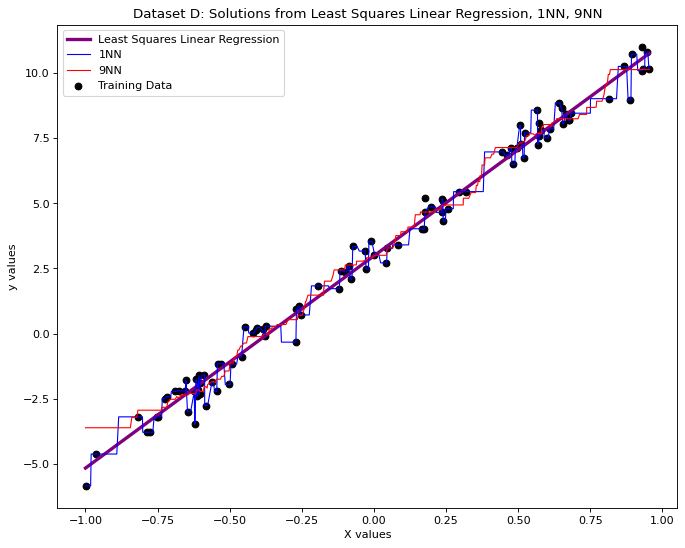

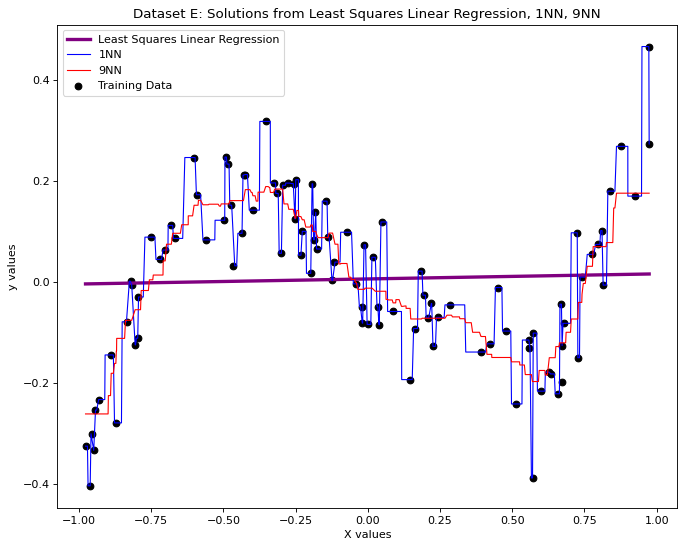

In [70]:
import matplotlib.pyplot as plt
import numpy as np
def plot1(X_train, y_train, X_test, title):
  plt.figure(figsize=(10, 8), dpi=80)
  reg_pred = lin_reg(X_train, y_train, X_test)
  plt.plot(X_test, reg_pred, color="purple", linewidth=3, label = "Least Squares Linear Regression")
  pred = knn_self(X_train, y_train, [1,9], X_test.flatten())
  plt.scatter(X_train, y_train, color="black", label = "Training Data")
  plt.plot(X_test.flatten(), pred[0], color="blue", linewidth=1, label = "1NN")
  plt.plot(X_test.flatten(), pred[-1], color="red", linewidth=1, label = "9NN")
  plt.legend()
  plt.xlabel("X values")
  plt.ylabel("y values")
  plt.title(title)

testD = add_values(X_train_D, 1000)
plot1(X_train_D, Y_train_D, testD, "Dataset D: Solutions from Least Squares Linear Regression, 1NN, 9NN")
testE = add_values(X_train_E, 1000)
plot1(X_train_E, Y_train_E, testE, "Dataset E: Solutions from Least Squares Linear Regression, 1NN, 9NN")

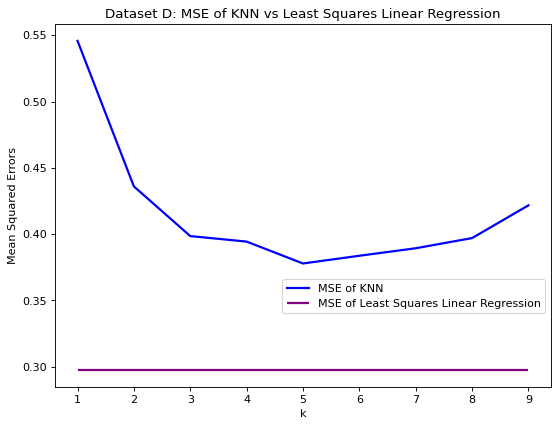

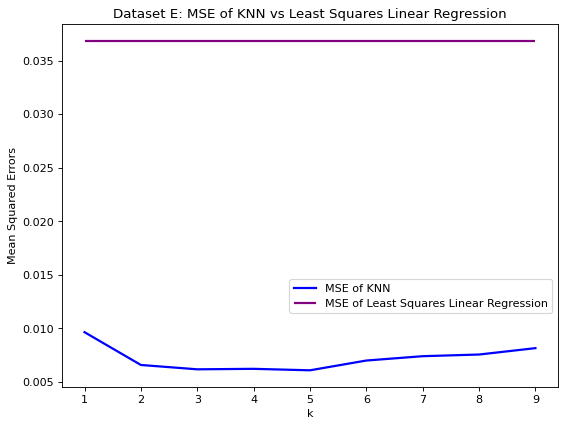

In [71]:
from sklearn.metrics import mean_squared_error
def plot2(X_train, y_train, X_test, y_test, lok, title):
  plt.figure(figsize=(8, 6), dpi=80)
  reg_pred = lin_reg(X_train, y_train, X_test)
  LSE = mean_squared_error(reg_pred, y_test)
  plt.hlines(y=LSE, xmin=1, xmax=max(lok), color="purple", linewidth=2, label = "MSE of Least Squares Linear Regression")
  pred = knn(X_train, y_train, lok, X_test)
  MSE = [0] * (len(lok))
  for i in range(0,len(lok)):
    MSE[i] = mean_squared_error(pred[i], y_test)
  plt.plot(lok, MSE, color="blue", linewidth=2, label = "MSE of KNN")
  plt.legend(loc='center right', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
  plt.xlabel("k")
  plt.ylabel("Mean Squared Errors")
  plt.title(title)

plot2(X_train_D, Y_train_D, X_test_D, Y_test_D, range(1,10), "Dataset D: MSE of KNN vs Least Squares Linear Regression")
plot2(X_train_E, Y_train_E, X_test_E, Y_test_E, range(1,10), "Dataset E: MSE of KNN vs Least Squares Linear Regression")


##### For Dataset D, Least Squares Linear Regression performs better for Dataset F with lower MSE. This may be due to the linearity of this dataset, which fits linear regression better. However, KNN performs better for Dataset E, which lacks such linearity.

#### Part 3

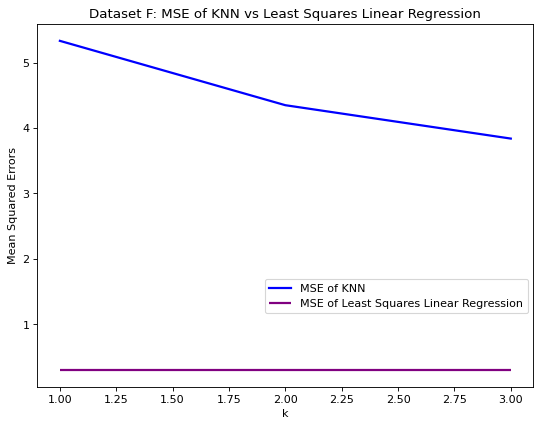

In [72]:
plot2(X_train_F, Y_train_F, X_test_F, Y_test_F, range(1, 4), "Dataset F: MSE of KNN vs Least Squares Linear Regression")

##### By inspection, Least Squares Linear Regression performs better for Dataset F with lower MSE. This is because distances between the test points and their k nearest neighbours in the training set F are larger than those in D and E. Range of MSE is also larger.

In [130]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('CS480A1.ipynb')

--2022-01-27 07:50:28--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-01-27 07:50:28 (12.0 MB/s) - ‘colab_pdf.py’ saved [1864/1864]

Mounted at /content/drive/




Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/CS480A1.ipynb to pdf
[NbConvertApp] Support files will be in CS480A1_files/
[NbConvertApp] Making directory ./CS480A1_files
[NbConvertApp] Making directory ./CS480A1_files
[NbConvertApp] Making directory ./CS480A1_files
[NbConvertApp] Making directory ./CS480A1_files
[NbConvertA

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'